In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np

In [3]:
from os.path import expanduser
home = expanduser("~")

import sys
# sys.path.insert(0, home + '/ros2_trace_test/src/tracetools_analysis/tracetools_analysis')
# sys.path.insert(0, home + '/ros2_foxy_fork/src/ros-tracing/ros2_tracing/tracetools_read')
sys.path.insert(0, home + '/ros2_ws/src/tracetools_analysis/tracetools_analysis')
sys.path.insert(0, home + '/ros2_foxy/src/ros-tracing/ros2_tracing/tracetools_read')
import pandas as pd

In [4]:
from tracetools_analysis.ros_model import ApplicationFactory

In [5]:
from tracetools_analysis.ros_model.comm import Comm
from tracetools_analysis.ros_model.node import NodePath

In [6]:
trace_path = '~/.ros/tracing/e2e_demo/ust'
architecture_path = './architecture.json'

In [7]:
app = ApplicationFactory.create(architecture_path)

In [8]:
list(app.nodes[0].callbacks)[1]

In [9]:
for path in app.paths:
    print(path.name)

SensorDummy::SensorDummy()::{lambda()#1}--NoDependencyNode::NoDependencyNode()::{lambda(std::unique_ptr<sensor_msgs::msg::Image>)#1}--SubDependencyNode::SubDependencyNode()::{lambda(std::unique_ptr<sensor_msgs::msg::Image>)#1}--TimerDependencyNode::TimerDependencyNode()::{lambda(std::unique_ptr<sensor_msgs::msg::Image>)#1}--TimerDependencyNode::TimerDependencyNode()::{lambda()#2}--ActuatorDummy::ActuatorDummy()::{lambda(std::unique_ptr<sensor_msgs::msg::Image>)#2}
SensorDummy::SensorDummy()::{lambda()#1}--NoDependencyNode::NoDependencyNode()::{lambda(std::unique_ptr<sensor_msgs::msg::Image>)#1}--SubDependencyNode::SubDependencyNode()::{lambda(std::unique_ptr<sensor_msgs::msg::Image>)#1}--SubDependencyNode::SubDependencyNode()::{lambda(std::unique_ptr<sensor_msgs::msg::Image>)#2}--ActuatorDummy::ActuatorDummy()::{lambda(std::unique_ptr<sensor_msgs::msg::Image>)#1}
SensorDummy::SensorDummy()::{lambda()#2}--SubDependencyNode::SubDependencyNode()::{lambda(std::unique_ptr<sensor_msgs::msg::

In [10]:
for node in app.nodes:
    for path in node.paths:
        print(node.name, '   ', path.name)

timer_dependency_node     TimerDependencyNode::TimerDependencyNode()::{lambda()#2}
timer_dependency_node     TimerDependencyNode::TimerDependencyNode()::{lambda(std::unique_ptr<sensor_msgs::msg::Image>)#1}--TimerDependencyNode::TimerDependencyNode()::{lambda()#2}
no_dependency_node     NoDependencyNode::NoDependencyNode()::{lambda(std::unique_ptr<sensor_msgs::msg::Image>)#1}
actuator_dummy_node     ActuatorDummy::ActuatorDummy()::{lambda(std::unique_ptr<sensor_msgs::msg::Image>)#1}
actuator_dummy_node     ActuatorDummy::ActuatorDummy()::{lambda(std::unique_ptr<sensor_msgs::msg::Image>)#2}
sub_dependency_node     SubDependencyNode::SubDependencyNode()::{lambda(std::unique_ptr<sensor_msgs::msg::Image>)#1}
sub_dependency_node     SubDependencyNode::SubDependencyNode()::{lambda(std::unique_ptr<sensor_msgs::msg::Image>)#1}--SubDependencyNode::SubDependencyNode()::{lambda(std::unique_ptr<sensor_msgs::msg::Image>)#2}
sub_dependency_node     SubDependencyNode::SubDependencyNode()::{lambda(std:

In [12]:
app.import_trace(trace_path)

found converted file: /home/hasegawa/.ros/tracing/e2e_demo/ust/converted
 [100%] [Ros2Handler]


In [13]:
# E2E path
e2e_path = app.paths[1]

In [14]:
for path in app.paths:
    print(path.name)

SensorDummy::SensorDummy()::{lambda()#1}--NoDependencyNode::NoDependencyNode()::{lambda(std::unique_ptr<sensor_msgs::msg::Image>)#1}--SubDependencyNode::SubDependencyNode()::{lambda(std::unique_ptr<sensor_msgs::msg::Image>)#1}--TimerDependencyNode::TimerDependencyNode()::{lambda(std::unique_ptr<sensor_msgs::msg::Image>)#1}--TimerDependencyNode::TimerDependencyNode()::{lambda()#2}--ActuatorDummy::ActuatorDummy()::{lambda(std::unique_ptr<sensor_msgs::msg::Image>)#2}
SensorDummy::SensorDummy()::{lambda()#1}--NoDependencyNode::NoDependencyNode()::{lambda(std::unique_ptr<sensor_msgs::msg::Image>)#1}--SubDependencyNode::SubDependencyNode()::{lambda(std::unique_ptr<sensor_msgs::msg::Image>)#1}--SubDependencyNode::SubDependencyNode()::{lambda(std::unique_ptr<sensor_msgs::msg::Image>)#2}--ActuatorDummy::ActuatorDummy()::{lambda(std::unique_ptr<sensor_msgs::msg::Image>)#1}
SensorDummy::SensorDummy()::{lambda()#2}--SubDependencyNode::SubDependencyNode()::{lambda(std::unique_ptr<sensor_msgs::msg::

In [15]:
import matplotlib.pyplot as plt

In [16]:
def label(path):
    return 'max: {} ms, {}'.format(path.max_ms, path.name)

Text(0, 0.5, 'Probability')

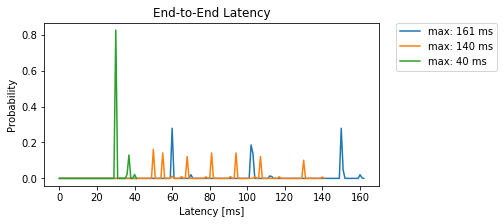

In [17]:
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(111)
ax.set_title('End-to-End Latency')
for path in app.paths:
    ax.plot(path.hist.raw, label='max: {} ms'.format(path.max_ms))
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.set_xlabel('Latency [ms]')
ax.set_ylabel('Probability')